In [80]:
# Importando Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Importando el data set
os.chdir("C:\\Users\\wichi\\OneDrive\\Documentos\\EBAC\\Data Science\\Actividades\\Ridge y Lasso")
df = pd.read_excel('FuelConsumptionCo2.xlsx')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [14]:
#Limpiando data set y dejando solo variables numericas
df_preprocess = df.loc[:, ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
df_preprocess.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,33,200
1,3.5,6,12.6,9.4,11.2,25,263
2,2.0,4,11.0,8.6,9.9,29,232
3,2.0,4,11.3,9.1,10.3,27,242
4,2.0,4,11.2,8.0,9.8,29,230


In [16]:
#Determinamos los nullos por columna
df_preprocess.isnull().sum()

ENGINESIZE                  0
CYLINDERS                   0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

<AxesSubplot: >

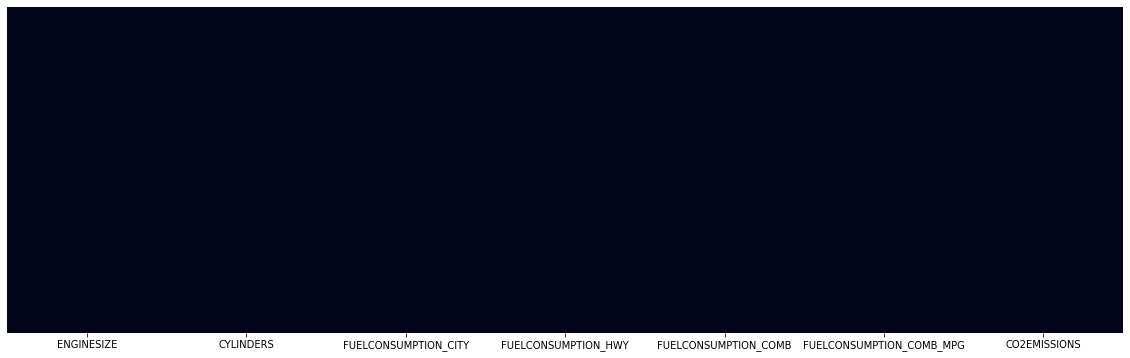

In [20]:
#Grafica que nos ayuda a visualizar los nulos por columnas
plt.figure(figsize = (20,6))
sns.heatmap(df_preprocess.isnull(),yticklabels=False, cbar=False)

In [21]:
#Numero de registros y columnas
df_preprocess.shape

(945, 7)

In [117]:
#Normalizando los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(df_preprocess)

In [118]:
#Creando el dataframe Normalizado
df_normalizado = pd.DataFrame(datos_normalizados, columns = df_preprocess.columns  )
df_normalizado

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,-0.583212,-0.864938,-0.758074,-1.037395,-0.869869,0.752281,-0.921779
1,0.217645,0.170358,0.024411,0.011095,0.033991,-0.289339,0.055691
2,-0.874433,-0.864938,-0.439284,-0.338402,-0.417939,0.231471,-0.425286
3,-0.874433,-0.864938,-0.352341,-0.119966,-0.278883,-0.028934,-0.270132
4,-0.874433,-0.864938,-0.381322,-0.600524,-0.452703,0.231471,-0.456317
...,...,...,...,...,...,...,...
940,-0.874433,-0.864938,-0.526227,-0.731586,-0.591758,0.361674,-0.626986
941,-0.874433,-0.864938,-0.584189,-0.556837,-0.591758,0.361674,-0.626986
942,-0.874433,-0.864938,-0.439284,-0.294715,-0.417939,0.231471,-0.425286
943,-0.874433,-0.864938,-0.294379,-0.425776,-0.348411,0.101269,-0.363225


In [119]:
#Separar las variables independientes y dependiente (variable a predecir)
x = df_normalizado.drop('CO2EMISSIONS', axis=1)
y = df_normalizado['CO2EMISSIONS']


In [120]:
x.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,-0.583212,-0.864938,-0.758074,-1.037395,-0.869869,0.752281
1,0.217645,0.170358,0.024411,0.011095,0.033991,-0.289339
2,-0.874433,-0.864938,-0.439284,-0.338402,-0.417939,0.231471
3,-0.874433,-0.864938,-0.352341,-0.119966,-0.278883,-0.028934
4,-0.874433,-0.864938,-0.381322,-0.600524,-0.452703,0.231471


In [121]:
y.head()

0   -0.921779
1    0.055691
2   -0.425286
3   -0.270132
4   -0.456317
Name: CO2EMISSIONS, dtype: float64

In [122]:
#Dividir bases de entrenamiento
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.30,random_state=1)

# Preparando los modelos

## Regresión lineal múltiple

In [292]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [293]:
#Coeficientes
print('Interceptor: ', linreg.intercept_)
print('Coeficientes: ', linreg.coef_)

Interceptor:  -0.006909985207992804
Coeficientes:  [-3.22890763e-04  1.92736420e-01 -7.10047949e-02  1.87172132e-02
  6.48858299e-01 -2.24376080e-01]


El interceptor (también conocido como constante) es el valor de la variable dependiente cuando todas las variables independientes son iguales a cero.
Los coeficientes de regresión lineal muestran la relación entre la variable dependiente y cada una de las variables independientes. Un coeficiente positivo indica que hay una relación positiva entre las dos variables, lo que significa que a medida que aumenta la variable independiente, también aumenta la variable dependiente. Un coeficiente negativo indica una relación negativa, lo que significa que a medida que aumenta la variable independiente, la variable dependiente disminuye.


In [281]:
#Predecir la variable dependiente
y_pred = linreg.predict(x_test)


In [334]:
#Calculos de la bondad entre los resultados predichos y los valores reales
from sklearn.metrics import r2_score
from sklearn import metrics
r_2_score_m = r2_score(y_test,y_pred)
v_abs_med_m= metrics.mean_absolute_error(y_test,y_pred)
mean_squared_er_m = metrics.mean_squared_error(y_test,y_pred)
err_cuad_medio_m = np.sqrt(metrics.mean_squared_error(y_test,y_pred))


### Regresión regularizada Ridge

In [253]:
# Definir un rango de prueba para el valor de Alpha
alpha_range = 10.**np.arange(-2,3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [254]:
from sklearn.linear_model import RidgeCV

In [255]:
ridgecv = RidgeCV(alphas=alpha_range, normalize = True, scoring ='neg_mean_squared_error')
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), normalize=True,
        scoring='neg_mean_squared_error')

In [257]:
ridgecv.alpha_

0.01

In [336]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=ridgecv.alpha_, normalize = True)
ridgereg.fit(x_train, y_train)
y_pred = ridgereg.predict(x_test)
#Calculos de la bondad entre los resultados predichos y los valores reales
from sklearn.metrics import r2_score
from sklearn import metrics
r_2_score_r = r2_score(y_test,y_pred)
v_abs_med_r= metrics.mean_absolute_error(y_test,y_pred)
mean_squared_er_r = metrics.mean_squared_error(y_test,y_pred)
err_cuad_medio_r = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

### Regresión regularizada Lasso

In [259]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize = True, random_state=1)
lassoregcv.fit(x_train,y_train)
print("Alpha óptimo: ", lassoregcv.alpha_)

Alpha óptimo:  0.00011622048132416951


In [260]:
print("Interceptor: ", lassoregcv.intercept_)
print("Coeficientes: ", lassoregcv.coef_)

Interceptor:  -0.0066078833092236
Coeficientes:  [ 0.          0.18879481  0.24460323  0.1871836   0.17665942 -0.22070875]


In [337]:
y_pred =lassoregcv.predict(x_test)
#Calculos de la bondad entre los resultados predichos y los valores reales
from sklearn.metrics import r2_score
from sklearn import metrics
r_2_score_L = r2_score(y_test,y_pred)
v_abs_med_L= metrics.mean_absolute_error(y_test,y_pred)
mean_squared_er_L = metrics.mean_squared_error(y_test,y_pred)
err_cuad_medio_L = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

# Comparación de bondad de los modelos

In [345]:
resultados_B_multiple = np.array([r_2_score_m, v_abs_med_m,mean_squared_er_m,err_cuad_medio_m] )
resultados_m_ridge = np.array([r_2_score_r, v_abs_med_r,mean_squared_er_r,err_cuad_medio_r] )
resultados_m_L = np.array([r_2_score_L, v_abs_med_L,mean_squared_er_L,err_cuad_medio_L] )
df_bondad = pd.DataFrame({'Regresión Multiple': resultados_B_multiple, 'Regresión Ridge': resultados_m_ridge, 'Regresión Lasso': resultados_m_L}, index=['R2_Score','MAE','MSE','RMSE'])
df_bondad

,Regresión Multiple,Regresión Ridge,Regresión Lasso
R2_Score,0.977616,0.977616,0.977465
MAE,0.099671,0.099671,0.099899
MSE,0.020621,0.020621,0.020760
RMSE,0.143600,0.143600,0.144083


Una interpretación del *R2_score* es que cuanto más cercano esté este valor a 1, mayor será la proporción de la variabilidad de la variable dependiente que se puede explicar por el modelo de regresión, lo que significa que el modelo se ajusta mejor a los datos.

El *MAE* se calcula como la media de las diferencias absolutas entre cada predicción del modelo y su valor verdadero correspondiente. En otras palabras, mide cuánto se desvían en promedio las predicciones del modelo de los valores verdaderos de la variable dependiente. 

Una forma de interpretar el *MSE* es que cuanto menor sea el valor, mejor será el ajuste del modelo a los datos. Un valor de ECM de cero indicaría que el modelo predice perfectamente la variable dependiente. 

Al igual que el MSE, un valor de *RMSE* más bajo indica que el modelo se ajusta mejor a los datos y hace predicciones más precisas. 

### Prediciendo la variable dependiente

In [247]:
# Capturando los datos de entrada
ENGINESIZE_user = float(input('¿Cual es el tamaño del motor? '))
CYLINDERS_user= int(input('¿Cuantos cilindros tiene tu auto? '))
FUELCONSUMPTION_CITY_user=float(input('¿Cual es el rendimiento de gasolina por milla en ciudad? '))
FUELCONSUMPTION_HWY_user=float(input('¿Cual es el rendimiento de gasolina por milla en carretera? '))
FUELCONSUMPTION_COMB_user=float(input('¿Cual es el rendimiento de gasolina por milla combinado? '))
FUELCONSUMPTION_COMB_MPG_user=float(input('¿Cual es el rendimiento de gasolina por milla combinado? '))
# Colocar las variables en un array
data_user = np.array([ENGINESIZE_user,CYLINDERS_user,FUELCONSUMPTION_CITY_user,FUELCONSUMPTION_HWY_user,FUELCONSUMPTION_COMB_user,FUELCONSUMPTION_COMB_MPG_user]).reshape(1,-1)


¿Cual es el tamaño del motor? 2.0
¿Cuantos cilindros tiene tu auto? 4
¿Cual es el rendimiento de gasolina por milla en ciudad? 11.0
¿Cual es el rendimiento de gasolina por milla en carretera? 8.6
¿Cual es el rendimiento de gasolina por milla combinado? 9.9
¿Cual es el rendimiento de gasolina por milla combinado? 29


In [298]:
#Normalizando los datos de entrada del usuario 
scaler_user = StandardScaler()
datos_independientes_normalizados = scaler_user.fit_transform(df_preprocess[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']])
data_user_normalizada = scaler_user.transform(data_user)
data_user_normalizada

array([[-0.87443259, -0.86493817, -0.38132192, -0.60052423, -0.45270265,
         0.23147117]])

### Funciones predictorias

In [299]:
#Funcion predictora regresión multiple
coeficientes = linreg.coef_
def predict_co2_emissions(coeficientes, data_user_normalizada):
    #Se obtienen los coeficientes
    b0 = coeficientes[0]
    b1 = coeficientes[1]
    b2 = coeficientes[2]
    b3 = coeficientes[3]
    b4 = coeficientes[4]
    b5 = coeficientes[5]
    
    # Obtiene los datos de entrada del usuario
    enginesize = data_user_normalizada[0:,0]
    cylinders = data_user_normalizada[0:,1]
    fuel_city = data_user_normalizada[0:,2]
    fuel_hwy = data_user_normalizada[0:,3]
    fuel_comb = data_user_normalizada[0:,4]
    fuel_mpg = data_user_normalizada[0:,5]
    
    # Calcula la variable dependiente
    dependiente = b0 + b1*enginesize + b2*cylinders + b3*fuel_city + b4*fuel_hwy + b5*fuel_comb
    
    # Devuelve la variable dependiente calculada
    return dependiente

In [316]:
#Funcion predictora Ridge
coeficientes_Ridge = ridgecv.coef_
def predict_co2_emissions_ridge(coeficientes_Ridge, data_user_normalizada):
    #Se obtienen los coeficientes
    b0 = coeficientes_Ridge[0]
    b1 = coeficientes_Ridge[1]
    b2 = coeficientes_Ridge[2]
    b3 = coeficientes_Ridge[3]
    b4 = coeficientes_Ridge[4]
    b5 = coeficientes_Ridge[5]
    
    # Obtiene los datos de entrada del usuario
    enginesize = data_user_normalizada[0:,0]
    cylinders = data_user_normalizada[0:,1]
    fuel_city = data_user_normalizada[0:,2]
    fuel_hwy = data_user_normalizada[0:,3]
    fuel_comb = data_user_normalizada[0:,4]
    fuel_mpg = data_user_normalizada[0:,5]
    
    # Calcula la variable dependiente
    dependiente = b0 + b1*enginesize + b2*cylinders + b3*fuel_city + b4*fuel_hwy + b5*fuel_comb
    
    # Devuelve la variable dependiente calculada
    return dependiente

In [317]:
#Funcion predictora Lasso
coeficientes_Lasso = lassoregcv.coef_
def predict_co2_emissions_lasso(coeficientes_Lasso, data_user_normalizada):
    #Se obtienen los coeficientes
    b0 = coeficientes_Lasso[0]
    b1 = coeficientes_Lasso[1]
    b2 = coeficientes_Lasso[2]
    b3 = coeficientes_Lasso[3]
    b4 = coeficientes_Lasso[4]
    b5 = coeficientes_Lasso[5]
    
    # Obtiene los datos de entrada del usuario
    enginesize = data_user_normalizada[0:,0]
    cylinders = data_user_normalizada[0:,1]
    fuel_city = data_user_normalizada[0:,2]
    fuel_hwy = data_user_normalizada[0:,3]
    fuel_comb = data_user_normalizada[0:,4]
    fuel_mpg = data_user_normalizada[0:,5]
    
    # Calcula la variable dependiente
    dependiente = b0 + b1*enginesize + b2*cylinders + b3*fuel_city + b4*fuel_hwy + b5*fuel_comb
    
    # Devuelve la variable dependiente calculada
    return dependiente

In [318]:
# Resultado regresión Múltiple
resultado_normalizado_multiple = predict_co2_emissions(coeficientes, data_user_normalizada)
resultado_normalizado_multiple

array([-0.40265991])

In [319]:
#Resultado regresión Ridge
resultado_normalizado_ridge = predict_co2_emissions_ridge(coeficientes_Ridge, data_user_normalizada)
resultado_normalizado_ridge

array([-0.4288094])

In [320]:
#Resultado regresión Lasso
resultado_normalizado_lasso = predict_co2_emissions_lasso(coeficientes_Lasso, data_user_normalizada)
resultado_normalizado_lasso

array([-0.45420505])

In [321]:
#Desnormalizando regresión Multiple
scaler_result = StandardScaler()
datos_dependientes_normalizados = scaler_result.fit_transform(df_preprocess[['CO2EMISSIONS']])
resultado_desnormalizado_reg_multiple = scaler_result.inverse_transform(resultado_normalizado_multiple.reshape(-1,1))
resultado_desnormalizado_reg_ridge = scaler_result.inverse_transform(resultado_normalizado_ridge.reshape(-1,1))
resultado_desnormalizado_reg_lasso = scaler_result.inverse_transform(resultado_normalizado_lasso.reshape(-1,1))

### Resultados

In [332]:
np_resultados =np.array([resultado_desnormalizado_reg_multiple[0,0], resultado_desnormalizado_reg_ridge[0,0], resultado_desnormalizado_reg_lasso[0,0]])
df_resultados = pd.DataFrame(np_resultados)
df_resultados = df_resultados.T
df_resultados.columns = ['Regresión Múltiple','Regresión Ridge','Regresión Lasso']
df_resultados

,Regresión Múltiple,Regresión Ridge,Regresión Lasso
0,233.458307,231.772917,230.136114


# ¿Cuál de los 3 modelos de regresión resultó mejor?

En conclusión, después de realizar un análisis exploratorio de los datos y de probar diferentes modelos de regresión, podemos concluir que la regresión Lasso es la mejor opción para determinar el modelo de nuestro conjunto de datos. La regresión Lasso nos permite reducir la complejidad del modelo y eliminar variables no significativas, lo que se traduce en una mejor capacidad de generalización del modelo y una menor probabilidad de sobreajuste